<a href="https://colab.research.google.com/github/Annmodels/mnist_recon/blob/master/KerasAdamMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [0]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()


In [0]:
numpix = xtrain.shape[1]*xtrain.shape[2]
xtrain = xtrain.reshape((xtrain.shape[0],numpix)).astype('float32')
xtest = xtest.reshape((xtest.shape[0],numpix)).astype('float32')
xtrain = xtrain/255
xtest = xtest/255

In [0]:
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)
numclasses = ytest.shape[1]

In [0]:
def basemodel():
  model = Sequential()
  model.add(Dense(numpix,input_dim = numpix,kernel_initializer = 'normal',activation = 'relu'))
  model.add(Dense(numclasses,kernel_initializer = 'normal',activation = 'softmax'))
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
  return model

In [0]:
model = basemodel()
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs = 10,batch_size = 200,verbose = 2)
scores = model.evaluate(xtest,ytest,verbose = 0)
print("base error:%.2f%%"%(100-scores[1]*100))
model.save("my_model.h5")

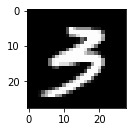

In [0]:
j = 643
(ox,oy),(oxt,oyt) = mnist.load_data()
plt.subplot(221)
plt.imshow(ox[j],cmap=plt.get_cmap('gray'))
plt.show()

In [0]:
import tensorflow as tf
import numpy as np
newmodel = tf.keras.models.load_model("my_model.h5")
vsx = ox[j].reshape(1,-1)/255
#vsy = ytrain[j].reshape(1,-1)
#print(vsy)
#vs = model.evaluate(vsx,vsy,verbose = 1)
#vsnew = newmodel.evaluate(vsx,vsy,verbose = 1)
#print(vs,vsnew)
#print("vbe:%.2f%%"%(100-vsnew[1]*100))
ypred = newmodel.predict(vsx)
print(np.argmax(ypred))

3
